<a href="https://colab.research.google.com/github/roshankumar31/ML-based-prediction-by-incorporating-dynamics-based-prediction/blob/main/ROSHAN_KUMAR_LC_REPORTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

In [ ]:
install.packages("BiocManager")
BiocManager::install("DESeq2")
BiocManager::install("EnhancedVolcano")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.19 (BiocManager 1.30.23), R 4.4.1 (2024-06-14)

Installing package(s) 'BiocVersion', 'DESeq2'

also installing the dependencies ‘formatR’, ‘UCSC.utils’, ‘GenomeInfoDbData’, ‘zlibbioc’, ‘abind’, ‘SparseArray’, ‘lambda.r’, ‘futile.options’, ‘GenomeInfoDb’, ‘XVector’, ‘S4Arrays’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocGenerics’, ‘Biobase’, ‘BiocParallel’, ‘matrixStats’, ‘locfit’, ‘MatrixGenerics’, ‘RcppArmadillo’


Old packages: 'gert', 'Rcpp', 'tinytex', 'xfun'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
 

#Differential Gene Expression Analysis with DESEQ2

In [ ]:
### Load Libraries
library("DESeq2")
library("EnhancedVolcano")

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, table,
    tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading r

## Load Data

In [ ]:
##Load data
LCdataset = read.table('/content/Raw_Only_LC.txt', header = TRUE, row.names = 1, sep='\t')
head(LCdataset)


,Control001,Control003,Control004,Control005,Control006,Control007,Control008,LongCOVID001,LongCOVID003,LongCOVID004,LongCOVID005,LongCOVID006,LongCOVID007
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003,41.00,6.00,50.00,8.00,30.00,15.00,13.00,23.00,15.00,13.00,19.0,10.00,2.00
ENSG00000000419,428.00,220.00,285.00,330.00,236.00,689.00,851.00,232.00,287.00,283.00,388.0,362.02,242.00
ENSG00000000457,270.63,125.68,287.77,198.59,190.87,114.17,138.92,189.61,269.86,255.72,295.5,265.09,212.37
ENSG00000000460,87.37,81.32,90.23,98.42,95.13,24.83,37.08,94.39,93.14,91.28,139.5,75.91,100.63
ENSG00000000938,13256.00,16721.00,9627.00,18248.00,14585.00,6423.00,7285.00,18962.00,18867.00,19945.00,14551.0,18705.00,11575.00
ENSG00000000971,47.00,29.24,48.00,36.00,17.00,23.00,66.00,48.00,29.00,88.00,84.0,70.00,38.00


##Check the dimensions of the data

In [ ]:
dim(LCdataset)

[1] 23731    13

## Define sample characteristics for the samples

In [ ]:
# Save the sample name into an object
names_LC <- colnames(LCdataset)
# Create sample annotation corresponding to their phenotypical condition or biological state
meta_classes <- c(rep("Ctrl",7), rep("LC",6))
# Combine both to a dataframe
meta_data <- data.frame(names_LC, meta_classes)
# Display the dataframe for verification
meta_data

names_LC,meta_classes
<chr>,<chr>
Control001,Ctrl
Control003,Ctrl
Control004,Ctrl
Control005,Ctrl
Control006,Ctrl
Control007,Ctrl
Control008,Ctrl
LongCOVID001,LC
LongCOVID003,LC


## Create the deseq object from the matrix data

In [ ]:
ds <- DESeqDataSetFromMatrix(countData = round(LCdataset,0),
                             colData = meta_data,
                             design = ~meta_classes)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


## Print out summary of the DESEQ object we created

In [ ]:
ds

class: DESeqDataSet 
dim: 23731 13 
metadata(1): version
assays(1): counts
rownames(23731): ENSG00000000003 ENSG00000000419 ... ENSG00000291316
  ENSG00000291317
rowData names(0):
colnames(13): Control001 Control003 ... LongCOVID006 LongCOVID007
colData names(2): names_LC meta_classes

## Run DESeq analysis

In [ ]:
# Run Deseq analysis
DS_run <- DESeq(ds)
# Store the results of the analysis
res <- results(DS_run)
# Print out the results
print(res)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 60 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



log2 fold change (MLE): meta classes LC vs Ctrl 
Wald test p-value: meta classes LC vs Ctrl 
DataFrame with 23731 rows and 6 columns
                  baseMean log2FoldChange     lfcSE      stat    pvalue
                 <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSG00000000003    18.5462      -0.854153  0.529807  -1.61220 0.1069193
ENSG00000000419   380.7032      -0.708400  0.338918  -2.09018 0.0366014
ENSG00000000457   212.3318       0.298407  0.194789   1.53195 0.1255346
ENSG00000000460    83.9757       0.349702  0.283700   1.23265 0.2177081
ENSG00000000938 14342.1762       0.367354  0.243155   1.51078 0.1308451
...                    ...            ...       ...       ...       ...
ENSG00000291309    2.17228       1.072200  0.933480  1.148605  0.250719
ENSG00000291313    0.00000             NA        NA        NA        NA
ENSG00000291315    5.13120      -0.485956  0.669347 -0.726014  0.467830
ENSG00000291316   16.00830      -1.049290  1.347920 -0.778451  0.436303
ENS

In [ ]:
# Filter genes with low expression values
ds_filt <- ds[ rowSums(counts(ds)) > 5, ]
# Print the summary of the new DESeq object
ds_filt

class: DESeqDataSet 
dim: 23100 13 
metadata(1): version
assays(1): counts
rownames(23100): ENSG00000000003 ENSG00000000419 ... ENSG00000291316
  ENSG00000291317
rowData names(0):
colnames(13): Control001 Control003 ... LongCOVID006 LongCOVID007
colData names(2): names_LC meta_classes

## Estimate the differential gene expression analysis again

In [ ]:
# Run Deseq2 Analysis
DS_run <- DESeq(ds_filt)
# Store the results of the analysis
res <- results(DS_run)
# Print the results
print(res)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 60 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



log2 fold change (MLE): meta classes LC vs Ctrl 
Wald test p-value: meta classes LC vs Ctrl 
DataFrame with 23100 rows and 6 columns
                  baseMean log2FoldChange     lfcSE      stat    pvalue
                 <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSG00000000003    18.5462      -0.854153  0.529782  -1.61227 0.1069022
ENSG00000000419   380.7032      -0.708400  0.338884  -2.09039 0.0365824
ENSG00000000457   212.3318       0.298408  0.194823   1.53169 0.1255989
ENSG00000000460    83.9757       0.349702  0.283712   1.23259 0.2177278
ENSG00000000938 14342.1762       0.367354  0.243155   1.51078 0.1308441
...                    ...            ...       ...       ...       ...
ENSG00000291300   69.38993     -0.0357103  0.498496 -0.071636  0.942892
ENSG00000291309    2.17228      1.0722075  0.933664  1.148388  0.250809
ENSG00000291315    5.13120     -0.4859599  0.669439 -0.725921  0.467887
ENSG00000291316   16.00830     -1.0492901  1.347920 -0.778451  0.436303
ENS

## Sort the dataframe by padj value to find out stastically significant genes

In [ ]:
# Sort in ascending order of statistical significance
res[order(res$padj),]

log2 fold change (MLE): meta classes LC vs Ctrl 
Wald test p-value: meta classes LC vs Ctrl 
DataFrame with 23100 rows and 6 columns
                 baseMean log2FoldChange     lfcSE      stat      pvalue
                <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSG00000267165  110.8154      -25.08925  3.011666  -8.33069 8.03738e-17
ENSG00000237296   10.7798       -6.82660  1.052002  -6.48915 8.63206e-11
ENSG00000151023  102.0722        1.58638  0.258518   6.13644 8.43923e-10
ENSG00000119684  510.7519        1.87779  0.312254   6.01368 1.81363e-09
ENSG00000162366  192.2553        3.17365  0.559665   5.67062 1.42284e-08
...                   ...            ...       ...       ...         ...
ENSG00000291273   1.24907       0.306710  1.290661  0.237638    0.812162
ENSG00000291280   3.31102       2.209882  1.375830  1.606218    0.108226
ENSG00000291286   1.00462      -0.443202  1.762276 -0.251494    0.801432
ENSG00000291309   2.17228       1.072208  0.933664  1.148388    

## Number of stastically significant genes

In [ ]:
# total number of genes that are statistically siginicant
sum(res$padj < 0.05, na.rm = TRUE)

[1] 354

## MA plot

Warning message in plot.window(...):
“"Main" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"Main" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"Main" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"Main" is not a graphical parameter”
Warning message in box(...):
“"Main" is not a graphical parameter”
Warning message in title(...):
“"Main" is not a graphical parameter”


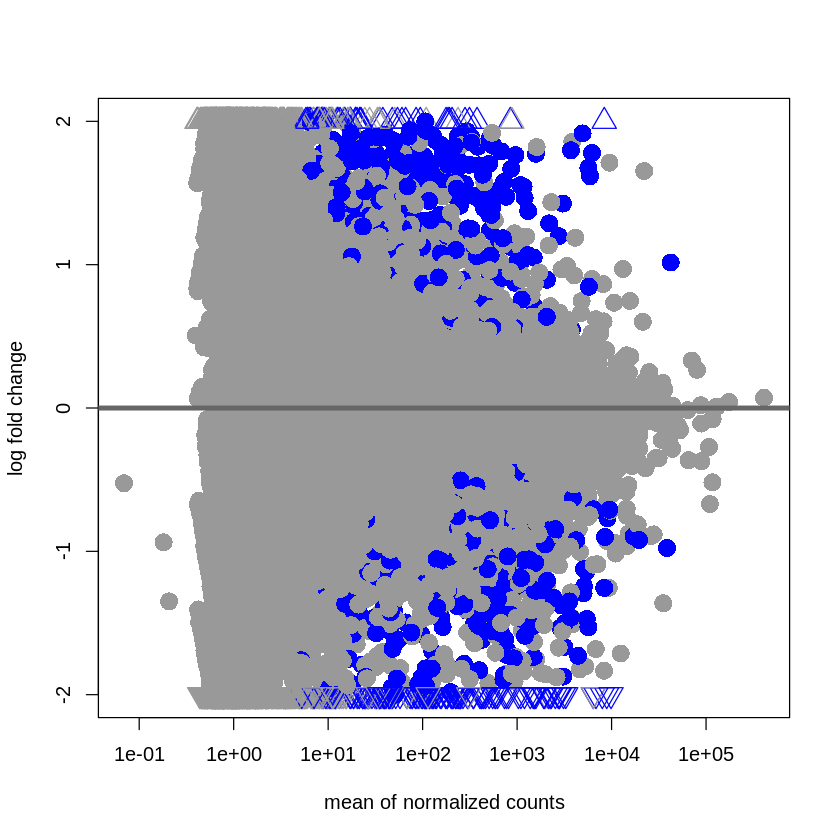

In [ ]:
plotMA(res, Main = "DESeq2", ylim = c(-2,2), cex = 2)

## find the min and max of log2fold change for plotting

In [ ]:
summary(res$log2FoldChange)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-25.08925  -0.36660  -0.01684  -0.05796   0.28735   5.68980 

## Volcano plot
The volcano plot summarises the differential gene expression analysis.
NS (grey) : non significant genes
Log2FC (green): gene with absolute fold change greater than 1
p value (blue) : genes that are statistically significant but no difference in the fold change
p value and log2FC (red) : genes that are statistically significant and a difference in the fold change that is great than 1 in absolute scale.

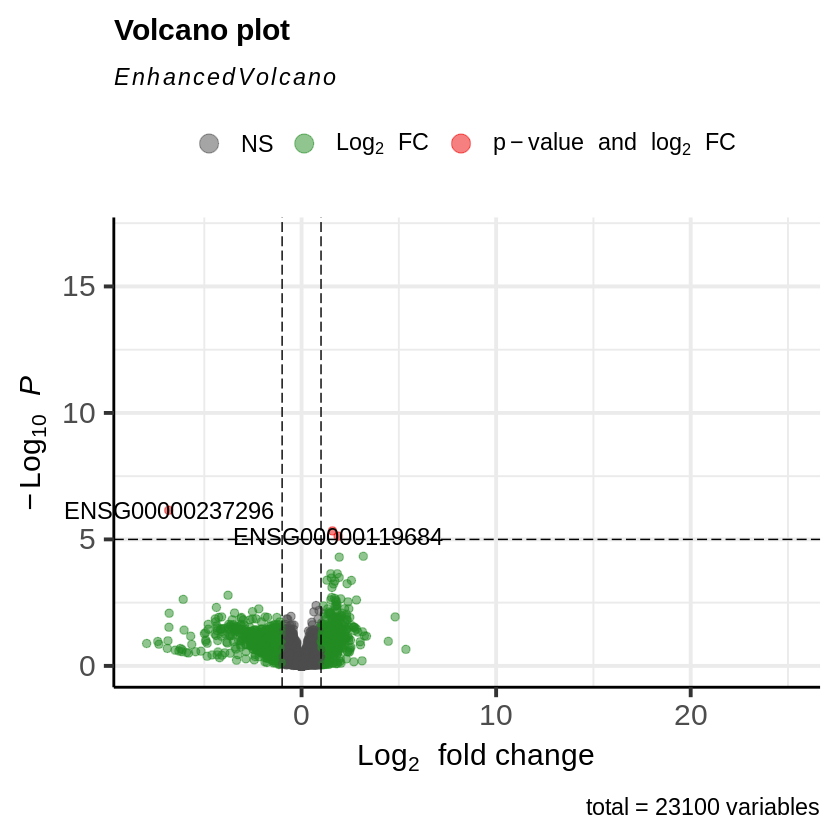

In [ ]:
EnhancedVolcano(res,
                x = 'log2FoldChange',
                y = 'padj',
                lab = rownames(res),
                xlim = c(-8,25))

##Output results in.txt format

In [ ]:
write.table(res,"DESeq2_LC_R1.txt", row.names=TRUE,col.names=TRUE, sep="\t", quote=TRUE, append=TRUE)

Warning message in write.table(res, "DESeq2_LC_R1.txt", row.names = TRUE, col.names = TRUE, :
“appending column names to file”


#KEGG Pathway Analysis


In [ ]:
BiocManager::install("gage")
BiocManager::install("gageData")
BiocManager::install("pathview")
BiocManager::install("clusterProfiler")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.19 (BiocManager 1.30.23), R 4.4.1 (2024-06-14)

Installing package(s) 'gage'

also installing the dependencies ‘plogr’, ‘png’, ‘Biostrings’, ‘RSQLite’, ‘graph’, ‘KEGGREST’, ‘AnnotationDbi’, ‘GO.db’


Old packages: 'gert', 'Rcpp', 'tinytex', 'xfun'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.19 (BiocManager 1.30.23), R 4.4.1 (2024-06-14)

Installing package(s) 'gageData'

Old packages: 'gert', 'Rcpp', 'tinytex', 'xfun'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.

In [ ]:
#Load libraries
library(gage)
library(gageData)
library(pathview)
library(clusterProfiler)





##############################################################################
Pathview is an open source software package distributed under GNU General
Public License version 3 (GPLv3). Details of GPLv3 is available at
http://www.gnu.org/licenses/gpl-3.0.html. Particullary, users are required to
formally cite the original Pathview paper (not just mention it) in publications
or products. For details, do citation("pathview") within R.

The pathview downloads and uses KEGG data. Non-academic uses may require a KEGG
license agreement (details at http://www.kegg.jp/kegg/legal.html).
##############################################################################

clusterProfiler v4.12.0  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics da

In [ ]:
# SET THE DESIRED ORGANISM HERE
organism = "org.Hs.eg.db"
BiocManager::install(organism, character.only = TRUE)
library(organism, character.only = TRUE)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.19 (BiocManager 1.30.23), R 4.4.1 (2024-06-14)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'org.Hs.eg.db'”
Old packages: 'gert', 'Rcpp', 'tinytex', 'xfun'

Loading required package: AnnotationDbi


Attaching package: ‘AnnotationDbi’


The following object is masked from ‘package:clusterProfiler’:

    select




In [ ]:
#Load DESeq2 results file as input file
result <- read.table("/content/DESeq2_LC_R1.txt", sep="\t", header = TRUE, row.names=1)
#Check top 10 lines in results
head(result)


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003,18.54618,-0.8541535,0.5297816,-1.612275,0.10690216,0.4156385
ENSG00000000419,380.70320,-0.7084002,0.3388836,-2.090394,0.03658242,0.2586112
ENSG00000000457,212.33184,0.2984078,0.1948226,1.531690,0.12559890,0.4471573
ENSG00000000460,83.97574,0.3497018,0.2837124,1.232593,0.21772781,0.5616664
ENSG00000000938,14342.17623,0.3673536,0.2431547,1.510782,0.13084409,0.4559165
ENSG00000000971,47.23397,0.5322437,0.3453163,1.541322,0.12323844,0.4434717


In [ ]:
#list of KEGG pathways genes
data(kegg.sets.hs)

#Index of numbers of pathway
data(sigmet.idx.hs)

#Extract cleaner gene set of important pathways
kegg.sets.hs <- kegg.sets.hs[sigmet.idx.hs]

In [ ]:
# Convert gene IDs for gseKEGG function
# We will lose some genes here because not all IDs will be converted
ids<-bitr(rownames(result), fromType = "ENSEMBL", toType = "ENTREZID", OrgDb=organism)

# remove duplicate IDS (here I use "ENSEMBL", but it should be whatever was selected as keyType)
dedup_ids = ids[!duplicated(ids[c("ENSEMBL")]),]

# Create a new dataframe df2 which has only the genes which were successfully mapped using the bitr function above
res_dedup = result[dedup_ids$ENSEMBL,]

# Create a new column in df2 with the corresponding ENTREZ IDs
res_dedup$ENTREZID = dedup_ids$ENTREZID

#Extract the fold changes from the results
foldchanges <- res_dedup$log2FoldChange

# Name fold change vector with ENTREZ ids
names(foldchanges) <- res_dedup$ENTREZID

# omit any NA values
foldchanges<-na.omit(foldchanges)

# sort the list in decreasing order (required for clusterProfiler)
foldchanges = sort(foldchanges, decreasing = TRUE)

#check top 5 values
head(foldchanges)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(rownames(result), fromType = "ENSEMBL", toType = "ENTREZID", :
“22.86% of input gene IDs are fail to map...”


56163    727940     84528    219970 106478943    414060 
 5.542663  5.152095  4.982656  4.833886  4.827132  4.766486

In [ ]:
#Get all KEGG pathways associated with genes
kegg_result <- gage(foldchanges, gsets=kegg.sets.hs, same.dir=TRUE)

#Write results of all pathways in a file
write.table(kegg_result, file="all_pathways.txt", sep="\t", row.names=FALSE,quote=FALSE)

Let's look at the result object. It is a list with three elements (“greater”, “less” and “stats”).

In [ ]:
#Check attributes
attributes(kegg_result)

$names
[1] "greater" "less"    "stats"

In [ ]:
#Check upregulated pathways
head(kegg_result$greater)

,p.geomean,stat.mean,p.val,q.val,set.size,exp1
hsa04810 Regulation of actin cytoskeleton,0.02081351,2.044760,0.02081351,0.964136,176,0.02081351
hsa04270 Vascular smooth muscle contraction,0.02832040,1.920015,0.02832040,0.964136,85,0.02832040
hsa04114 Oocyte meiosis,0.04011797,1.759010,0.04011797,0.964136,98,0.04011797
hsa00140 Steroid hormone biosynthesis,0.05484450,1.631404,0.05484450,0.964136,27,0.05484450
hsa04020 Calcium signaling pathway,0.06415117,1.525889,0.06415117,0.964136,126,0.06415117
hsa00514 Other types of O-glycan biosynthesis,0.06433986,1.542155,0.06433986,0.964136,29,0.06433986


In [ ]:
#check down regulated pathways
head(kegg_result$less)

,p.geomean,stat.mean,p.val,q.val,set.size,exp1
hsa03010 Ribosome,0.003831342,-2.724942,0.003831342,0.4200785,86,0.003831342
hsa04630 Jak-STAT signaling pathway,0.005306368,-2.577431,0.005306368,0.4200785,114,0.005306368
hsa04360 Axon guidance,0.007827549,-2.437049,0.007827549,0.4200785,105,0.007827549
hsa04010 MAPK signaling pathway,0.013372706,-2.222899,0.013372706,0.4901421,220,0.013372706
hsa04621 NOD-like receptor signaling pathway,0.017488376,-2.135283,0.017488376,0.4901421,56,0.017488376
hsa04380 Osteoclast differentiation,0.018266166,-2.102817,0.018266166,0.4901421,122,0.018266166


In [ ]:
#Extract all upregulated pathways data
Upreg_pathways <- data.frame(Pathway_id=rownames(kegg_result$greater), kegg_result$greater)

#write all upregulated pathways into a file
write.table(Upreg_pathways, file="upregulated_pathways.txt", sep="\t", row.names=F, quote=FALSE)

In [ ]:
#Extract all downregulated pathways data
Downreg_pathways <- data.frame(Pathway_id=rownames(kegg_result$less), kegg_result$less)

#write all downregulated pathways into a file
write.table(Downreg_pathways, file="Downregulated_pathways.txt", sep="\t", row.names=F, quote=FALSE)

In [ ]:
#Visualize one upregulated pathway
pathview(gene.data=foldchanges, pathway.id="hsa04514")

Info: Downloading xml files for hsa04514, 1/1 pathways..

Info: Downloading png files for hsa04514, 1/1 pathways..

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory /content

Info: Writing image file hsa04514.pathview.png



In [ ]:
#Obtain a different PDF based output of the same data
pathview(gene.data=foldchanges, pathway.id="hsa04514", kegg.native=FALSE)

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory /content

Info: Writing image file hsa04514.pathview.pdf



In [ ]:
#Extract the top 5 upregulated pathways
keggrespathways_up <- rownames(kegg_result$greater)[1:5]

#Extract the IDs part of each string
keggresids_up <- substr(keggrespathways_up, start=1, stop=8)
head(keggresids_up)

#write Ids in a file
write.table(keggresids_up, file="top5_upreg_pathways_ids.txt", sep="\t", row.names=F, quote=FALSE)

[1] "hsa04810" "hsa04270" "hsa04114" "hsa00140" "hsa04020"

In [ ]:
#Draw plots for top 5 upregulated pathways
pathview(gene.data=foldchanges, pathway.id=keggresids_up, species="hsa")

Info: Downloading xml files for hsa04810, 1/1 pathways..

Info: Downloading png files for hsa04810, 1/1 pathways..

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory /content

Info: Writing image file hsa04810.pathview.png

Info: Downloading xml files for hsa04270, 1/1 pathways..

Info: Downloading png files for hsa04270, 1/1 pathways..

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory /content

Info: Writing image file hsa04270.pathview.png

Info: Downloading xml files for hsa04114, 1/1 pathways..

Info: Downloading png files for hsa04114, 1/1 pathways..

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory /content

Info: Writing image file hsa04114.pathview.png

Info: Downloading xml files for hsa00140, 1/1 pathways..

Info: Downloading png files for hsa00140, 1/1 pathways..

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory /content

Info: Writin

In [ ]:
#Extract top 5 down regulated pathways
keggrespathways_down <- rownames(kegg_result$less)[1:5]

#Extract the IDs
keggresids_down = substr(keggrespathways_down, start=1, stop=8)
head(keggresids_down)


#write Ids in a file
write.table(keggresids_down, file="top5_downreg_pathways_ids.txt", sep="\t", row.names=F, quote=FALSE)

[1] "hsa03010" "hsa04630" "hsa04360" "hsa04010" "hsa04621"

In [ ]:
#Draw plots for top 5 upregulated pathways
pathview(gene.data=foldchanges, pathway.id=keggresids_down, species="hsa")

Info: Downloading xml files for hsa03010, 1/1 pathways..

Info: Downloading png files for hsa03010, 1/1 pathways..

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory /content

Info: Writing image file hsa03010.pathview.png

Info: Downloading xml files for hsa04630, 1/1 pathways..

Info: Downloading png files for hsa04630, 1/1 pathways..

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory /content

Info: Writing image file hsa04630.pathview.png

Info: Downloading xml files for hsa04360, 1/1 pathways..

Info: Downloading png files for hsa04360, 1/1 pathways..

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory /content

Info: Writing image file hsa04360.pathview.png

Info: Downloading xml files for hsa04010, 1/1 pathways..

Info: Downloading png files for hsa04010, 1/1 pathways..

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory /content

Info: Writin

#Gene Set Enrichment Analysis for GO


In [ ]:
BiocManager::install("clusterProfiler")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.19 (BiocManager 1.30.23), R 4.4.1 (2024-06-14)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'clusterProfiler'”
Old packages: 'gert', 'Rcpp', 'tinytex', 'xfun'



This code uses the BiocManager package to install the clusterProfiler package.

The BiocManager package is a utility package for managing Bioconductor packages, which are specialized packages for the analysis of biological data. The install function is called to install the clusterProfiler package. This package provides tools for functional enrichment analysis and visualization of gene expression data, which can be used to gain insight into the biological functions and pathways associated with differentially expressed genes.

To use this code, you will need to have the BiocManager package installed. Once you have it installed, you can simply copy and paste this code into your R console or script and it will download and install the clusterProfiler package.

In [ ]:
# SET THE DESIRED ORGANISM HERE
organism = "org.Hs.eg.db"
BiocManager::install(organism, character.only = TRUE)
library(organism, character.only = TRUE)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.19 (BiocManager 1.30.23), R 4.4.1 (2024-06-14)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'org.Hs.eg.db'”
Old packages: 'gert', 'Rcpp', 'tinytex', 'xfun'



This code installs and loads the org.Hs.eg.db package, which provides annotation data for the human genome.

The first line of code sets the desired organism as a character string, which in this case is "org.Hs.eg.db". This indicates that the package containing the annotation data for the human genome should be used.

The second line of code uses the BiocManager package to install the org.Hs.eg.db package. The character.only = TRUE argument ensures that the argument is treated as a character string.

The third line of code loads the org.Hs.eg.db package, which makes the annotation data available for use in the R environment.

Overall, this code prepares the necessary annotation data for the human genome, which can be used in downstream analyses such as gene ontology enrichment analysis or pathway analysis.

In [ ]:
library(clusterProfiler)

This code loads the clusterProfiler package, which provides a suite of functions for functional enrichment analysis and visualization of gene expression data.

The clusterProfiler package is a Bioconductor package and is primarily used for analyzing gene expression data. It provides a variety of functions for identifying enriched gene ontology terms, pathways, and other functional annotations in a set of genes, and for visualizing the results of these analyses.

Once loaded, the package functions can be accessed using their corresponding function names in the R environment.

In [ ]:
#Load DESeq2 results file as input file
result <- read.table("/content/DESeq2_LC_R1.txt", sep="\t", header = TRUE, row.names=1)
#Check top 10 lines in results
head(result)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003,18.54618,-0.8541535,0.5297816,-1.612275,0.10690216,0.4156385
ENSG00000000419,380.70320,-0.7084002,0.3388836,-2.090394,0.03658242,0.2586112
ENSG00000000457,212.33184,0.2984078,0.1948226,1.531690,0.12559890,0.4471573
ENSG00000000460,83.97574,0.3497018,0.2837124,1.232593,0.21772781,0.5616664
ENSG00000000938,14342.17623,0.3673536,0.2431547,1.510782,0.13084409,0.4559165
ENSG00000000971,47.23397,0.5322437,0.3453163,1.541322,0.12323844,0.4434717


This code reads in a DESeq2 results file from a URL and assigns it to the result variable.

The read.table function is used to read in the file, which is in tab-separated format (indicated by sep="\t") and has a header row (indicated by header=TRUE). The row.names=1 argument specifies that the first column of the file should be used as row names in the resulting data frame.

The URL points to a file hosted on GitHub and contains gene expression data for a set of PDX (patient-derived xenograft) samples.

The head function is then used to display the top 10 lines of the result data frame, which allows you to inspect the contents of the file and verify that it was loaded correctly.

In [ ]:
# Convert gene IDs for gseGO function
# We will lose some genes here because not all IDs will be converted
ids<-bitr(rownames(result), fromType = "ENSEMBL", toType = "SYMBOL", OrgDb=organism)

# remove duplicate IDS (here I use "ENSEMBL", but it should be whatever was selected as keyType)
dedup_ids = ids[!duplicated(ids[c("ENSEMBL")]),]

# Create a new dataframe df2 which has only the genes which were successfully mapped using the bitr function above
res_dedup = result[dedup_ids$ENSEMBL,]

# Create a new column in df2 with the corresponding ENTREZ IDs
res_dedup$SYMBOL = dedup_ids$SYMBOL

#Extract the fold changes from the results
foldchanges <- res_dedup$log2FoldChange

# Name fold change vector with ENTREZ ids
names(foldchanges) <- res_dedup$SYMBOL

# omit any NA values
foldchanges<-na.omit(foldchanges)

# sort the list in decreasing order (required for clusterProfiler)
foldchanges = sort(foldchanges, decreasing = TRUE)

#check top 5 values
head(foldchanges)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(rownames(result), fromType = "ENSEMBL", toType = "SYMBOL", :
“22.86% of input gene IDs are fail to map...”


RNF17  RHOXF2B   RHOXF2  GLYATL2  MTND6P4  TBC1D3C 
5.542663 5.152095 4.982656 4.833886 4.827132 4.766486

This code block aims to convert the gene IDs from Ensembl IDs to Gene Symbols using the bitr function from the clusterProfiler package. Here's how it works step-by-step:

ids <- bitr(rownames(result), fromType = "ENSEMBL", toType = "SYMBOL", OrgDb=organism): This line uses the bitr function to convert Ensembl gene IDs to gene symbols. rownames(result) extracts the gene IDs from the result data frame and the fromType argument specifies the type of input gene IDs. toType argument specifies the desired output gene IDs. The OrgDb argument specifies the organism database to use for the conversion.

dedup_ids = ids[!duplicated(ids[c("ENSEMBL")]),]: This line removes duplicated Ensembl gene IDs from the ids data frame, and saves the result to dedup_ids.

res_dedup = result[dedup_ids$ENSEMBL,]: This line creates a new data frame res_dedup with only the rows (genes) that have successfully mapped Ensembl IDs.

res_dedup$SYMBOL = dedup_ids$SYMBOL: This line adds a new column called "SYMBOL" to res_dedup data frame, which contains the corresponding gene symbols for each row.

foldchanges <- res_dedup$log2FoldChange: This line extracts the log2 fold changes from the res_dedup data frame and saves them to foldchanges.

names(foldchanges) <- res_dedup$SYMBOL: This line names the foldchanges vector with the corresponding gene symbols.

foldchanges<-na.omit(foldchanges): This line removes any NA values from the foldchanges vector.

foldchanges = sort(foldchanges, decreasing = TRUE): This line sorts the foldchanges vector in descending order. This is required for clusterProfiler package, which expects a ranked list of genes for some of its functions.

head(foldchanges): This line checks the top 5 genes in the foldchanges vector after all the above processing.

In [ ]:
#run GSEA for GO respository
gse <- gseGO(geneList=foldchanges,
             ont ="ALL",
             keyType = "SYMBOL",
             nPerm = 10000,
             minGSSize = 3,
             maxGSSize = 800,
             pvalueCutoff = 0.05,
             verbose = TRUE,
             OrgDb = organism,
             pAdjustMethod = "none")

using 'fgsea' for GSEA analysis, please cite Korotkevich et al (2019).


preparing geneSet collections...

GSEA analysis...

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
“We do not recommend using nPerm parameter incurrent and future releases”
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
“You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.13% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are duplicate gene names, fgsea may produce unexpected results.”
leading edge analysis...

done...



This code chunk is performing Gene Set Enrichment Analysis (GSEA) using the gseGO function from the clusterProfiler package.

Here's a brief explanation of the parameters used in this function:

geneList: The vector of log2 fold changes for each gene, with gene symbols as names. This is the input gene list for GSEA.
ont: The ontology database to use. In this case, ALL is used to include all available ontologies (i.e. "BP", "CC", "MF", "DO", "Kegg", "Reactome").
keyType: The type of gene identifier used in the input gene list. Here, SYMBOL is used since we converted ENSEMBL IDs to SYMBOL IDs in the previous step.
nPerm: The number of permutations to perform to estimate the statistical significance of gene set enrichment.
minGSSize: The minimum size of gene sets to consider.
maxGSSize: The maximum size of gene sets to consider.
pvalueCutoff: The p-value cutoff for calling significant enriched gene sets.
verbose: Whether to print progress information during the analysis.
OrgDb: The organism database to use, which is organism in this case.
pAdjustMethod: The method to use for p-value adjustment for multiple comparisons. none is used here since we're not adjusting for multiple comparisons.
The output of the gseGO function is a data.frame containing the enriched GO terms, their associated gene sets, and statistical significance measures.

## Save the GSEA GO analysis results

In [ ]:
write.csv(gse,"LC_GO_GSEA.csv")

The function write.csv() is used to write a data frame or matrix to a CSV file. In this case, the data frame gse is being written to a CSV file named "PDX_GO_GSEA.csv". The CSV file will be created in the working directory of the R session. The data in the CSV file will be comma-separated, and each row will represent a GO term with information about its enrichment, significance, etc. This CSV file can be easily imported into other software programs or used for further downstream analysis.

In [ ]:
library(repr)

# Change plot size to 8 inches wide
options(repr.plot.width=10)

The repr package is used to specify the graphical parameters for R plots, such as plot size, resolution, font size, etc. Here, library(repr) loads the repr package.

options(repr.plot.width=10) sets the plot width to 10 inches. This will affect any subsequent plot created in R. By default, plots are relatively small in size, so adjusting the plot size can make it easier to visualize and analyze the data.

##Dotplot

Loading required package: DOSE

DOSE v3.30.1  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use DOSE in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Guang-Rong Yan, Qing-Yu He. DOSE: an R/Bioconductor package for Disease Ontology Semantic and Enrichment analysis. Bioinformatics 2015, 31(4):608-609




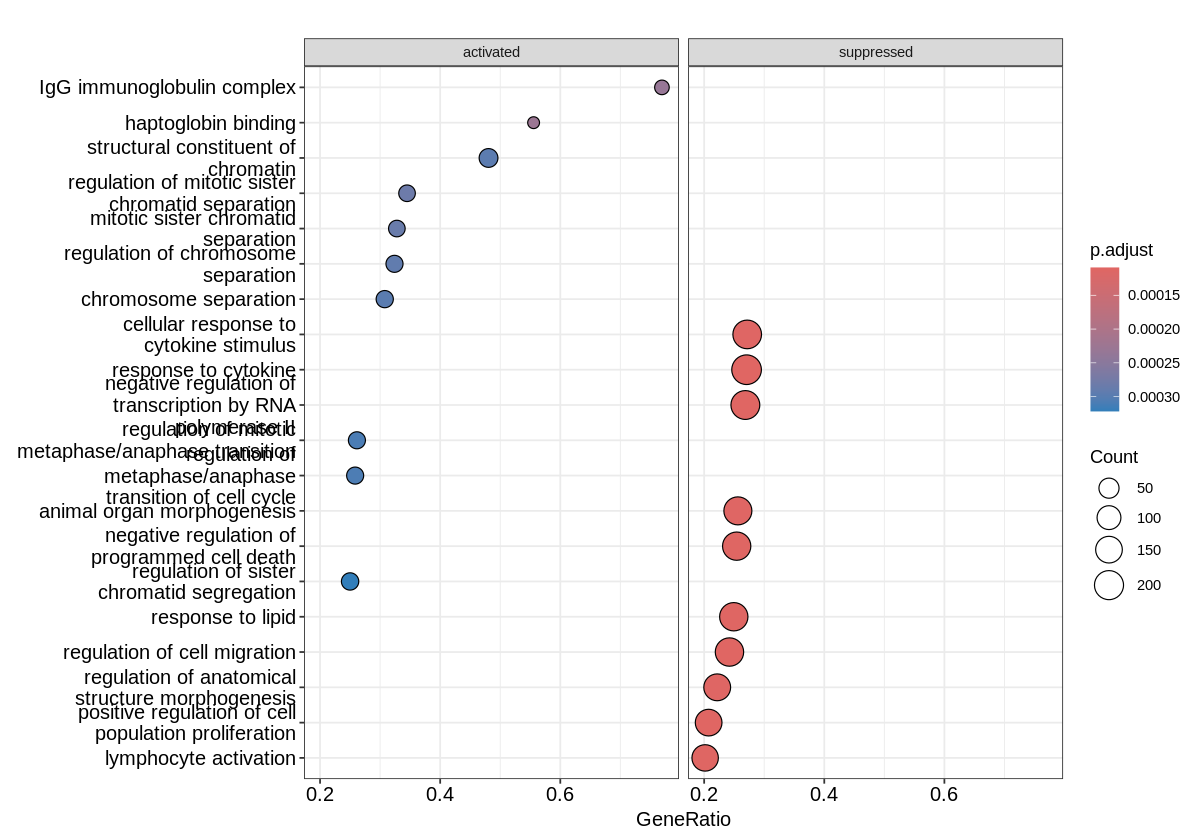

In [ ]:
require(DOSE)
dotplot(gse, showCategory=10, split=".sign") + facet_grid(.~.sign)

In the code snippet above, require(DOSE) loads the DOSE package which is a Bioconductor package for Disease Ontology Semantic and Enrichment analysis. The dotplot() function from the same package is then used to create a dot plot to visualize enriched gene ontology terms.

dotplot() function takes the output from gseGO() as input and creates a dot plot of the enriched GO terms. The showCategory argument controls the number of top enriched GO terms to show in the plot. The split argument splits the plot into two panels, one for upregulated genes and one for downregulated genes. Finally, facet_grid() arranges the two panels next to each other horizontally.

##Category Network Plot

Warning message in cnetplot.enrichResult(x, ...):
“Use 'color.params = list(foldChange = your_value)' instead of 'foldChange'.
 The foldChange parameter will be removed in the next version.”
Warning message:
“Removed 633 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”


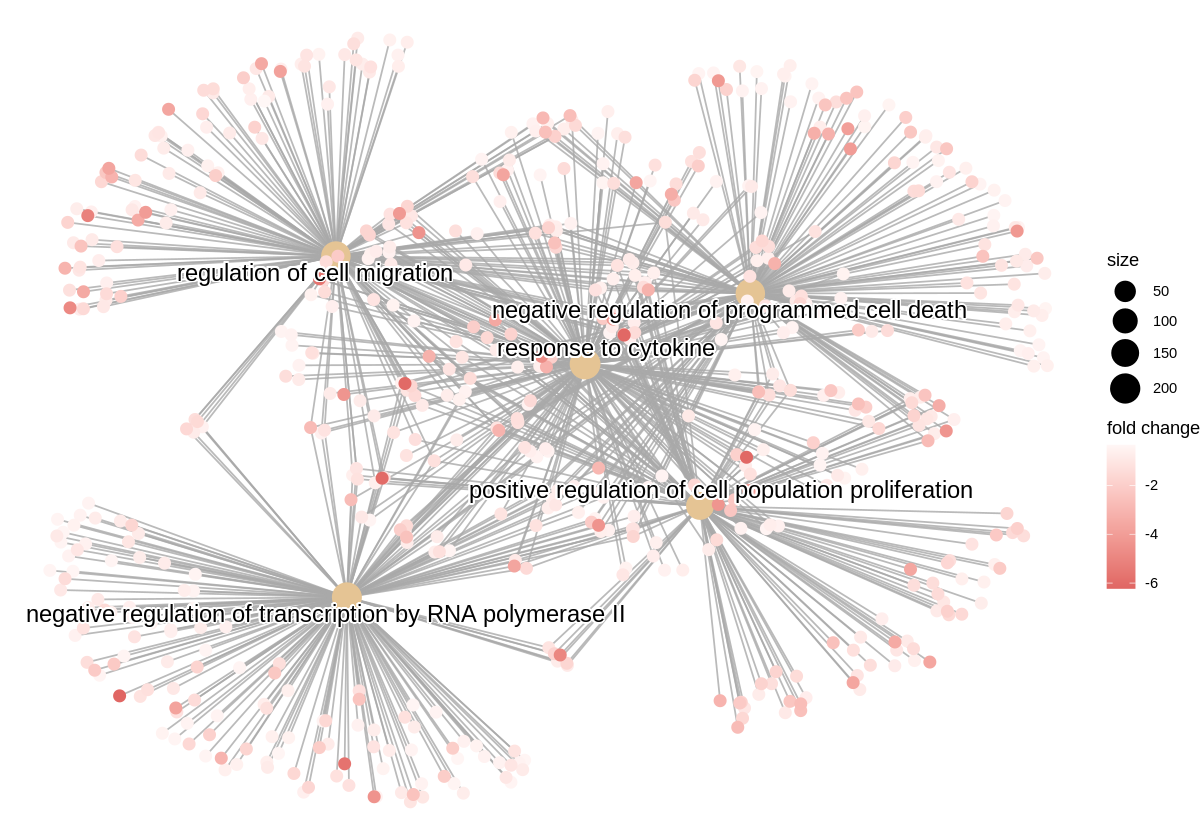

In [ ]:
# categorySize can be either 'pvalue' or 'geneNum'
cnetplot(gse,font.size=4, categorySize="geneNum", foldChange=foldchanges,max.overlaps=50,node_label="category")

This code is used to create a Cnetplot of the GSEA results using the cnetplot function from the clusterProfiler package.

The gse object generated by the gseGO function is used as input for the cnetplot function. Additionally, the foldchanges object generated earlier is used to indicate the direction of gene expression changes in the plot.

The categorySize argument is used to specify how to size the nodes in the plot. In this case, geneNum is chosen to indicate the number of genes in each category.

max.overlaps limits the number of overlapping nodes.

node_label argument is used to display the category labels as node labels.

font.size is used to specify the size of font in plot.

Warning message in cnetplot.enrichResult(x, ...):
“Use 'color.params = list(foldChange = your_value)' instead of 'foldChange'.
 The foldChange parameter will be removed in the next version.”
Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”
Warning message:
“ggrepel: 628 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


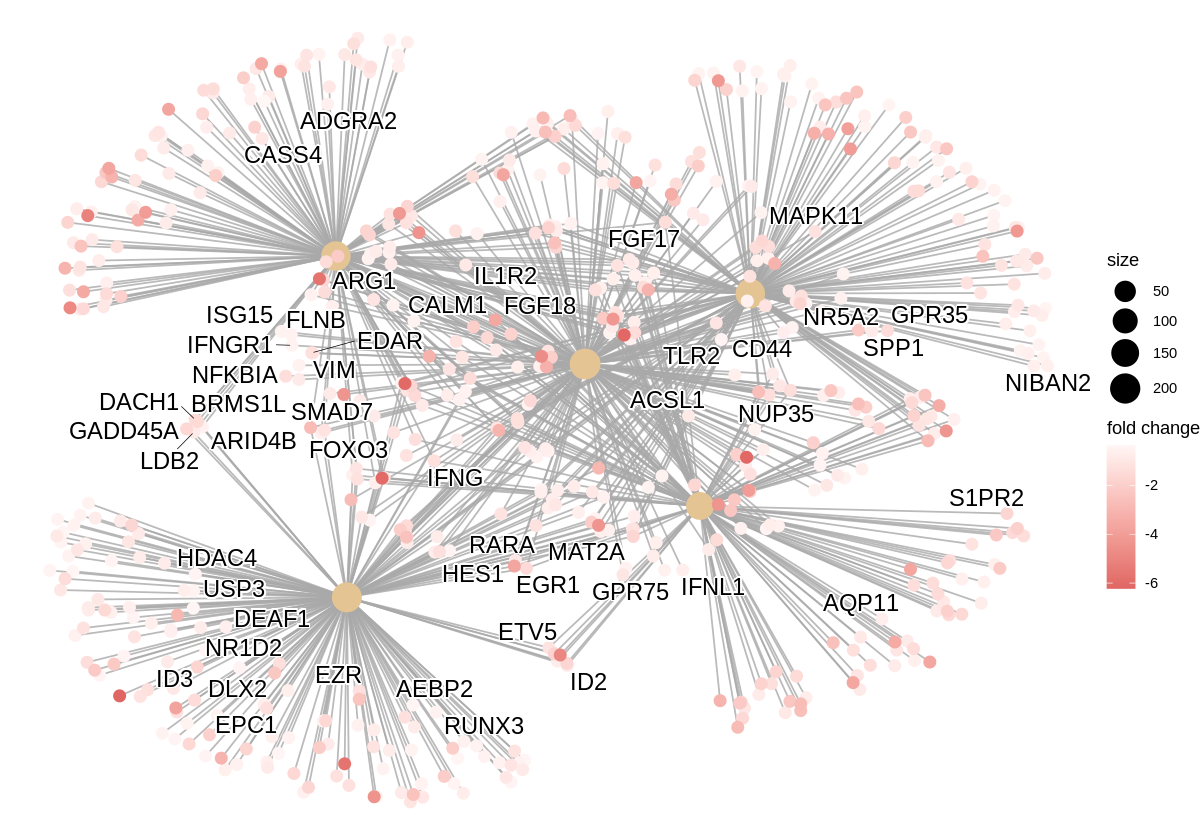

In [ ]:
# categorySize can be either 'pvalue' or 'geneNum'
cnetplot(gse,font.size=4, categorySize="geneNum", foldChange=foldchanges,max.overlaps=50,node_label="gene")

cnetplot is a function in the clusterProfiler package that generates a Cnetplot, which is a network visualization that depicts gene sets as nodes and their overlap as edges. The size of the node represents the number of genes in the gene set or the significance of the gene set (depending on the categorySize parameter). The thickness of the edge represents the overlap between two gene sets.

The code above generates a Cnetplot using the gse object generated from gseGO function and the foldchanges vector, which contains the log2 fold changes for the differentially expressed genes. The font.size parameter specifies the size of the text in the plot, while the categorySize parameter sets the size of the nodes to be proportional to the number of genes in each category. The max.overlaps parameter sets the maximum number of overlaps to be displayed for each node. Finally, the node_label parameter specifies whether the nodes should be labeled with the category or the gene symbol.

##Upset plot

In [ ]:
install.packages("ggupset")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ggupset is an R package that provides a way to visualize sets and their intersections in a manner that is similar to UpSet. It can be installed using the install.packages() function, which installs the package from the Comprehensive R Archive Network (CRAN) repository.

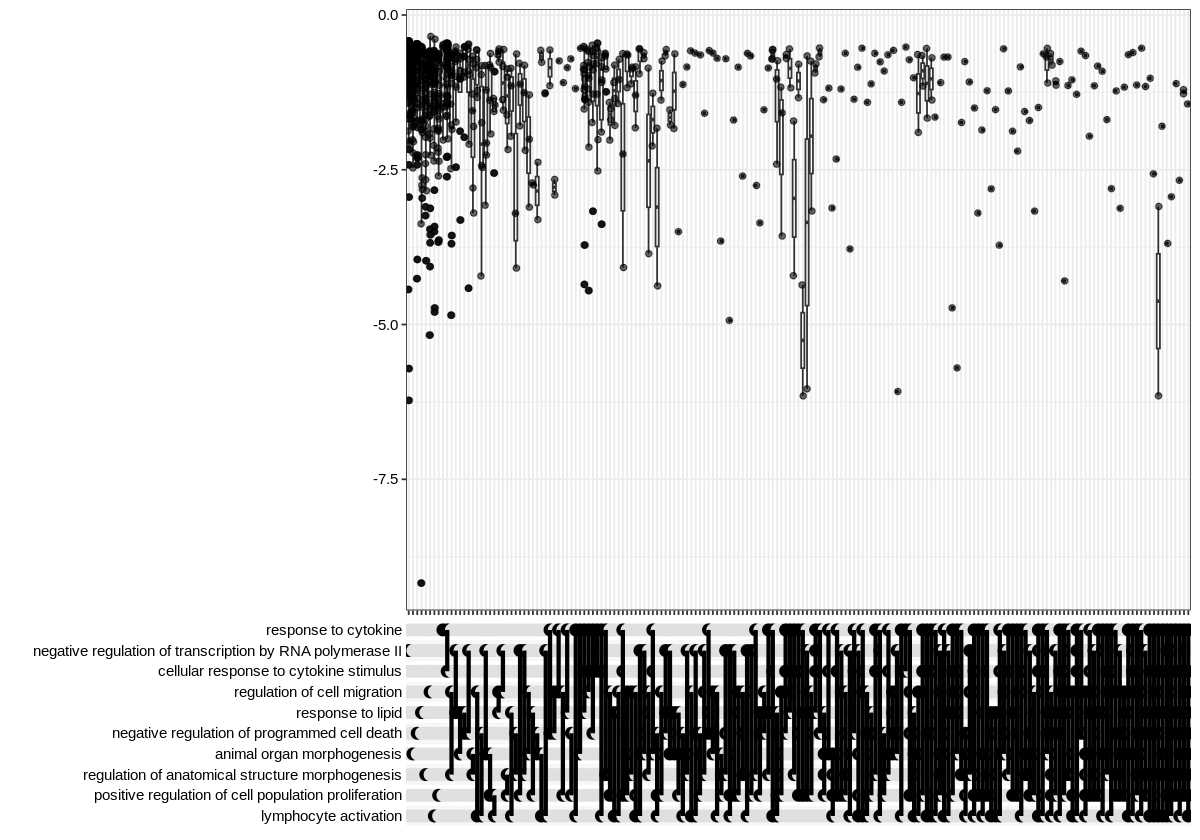

In [ ]:
library(ggupset)
enrichplot::upsetplot(gse, n = 10) + theme(axis.text.y = element_text(size = 9))

This code chunk first loads the ggupset library. ggupset is an extension to the ggplot2 package for visualizing sets and intersections.

The second line of code creates an upset plot using enrichplot::upsetplot(), which takes gse as input. gse is the output from the gseGO() function, which contains information on the enriched GO terms. The n = 10 parameter specifies the maximum number of sets to display. The theme() function is then used to adjust the size of the y-axis text to 9 points.

The resulting plot shows a visualization of the intersections between the enriched GO terms. The bars on the left show the number of genes enriched in each GO term, and the bars on the right show the number of intersections between each combination of GO terms. The numbers in the intersections indicate the number of genes shared by the GO terms in that intersection.

##Ridgeplot

In [ ]:
install.packages("ggridges")
library(ggridges)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ggridges is an R package for creating ridge plots, also known as Joy plots. Ridge plots are a type of data visualization that show the distribution of a numeric variable for different categories. In a ridge plot, each category is represented by a density plot, and the plots are aligned so that they share a common x-axis. This allows for easy comparison between the distributions. Ridge plots are useful for visualizing how the distribution of a variable changes across different groups or time points. The ggridges package provides an implementation of ridge plots that works well with the ggplot2 package.

Picking joint bandwidth of 0.251



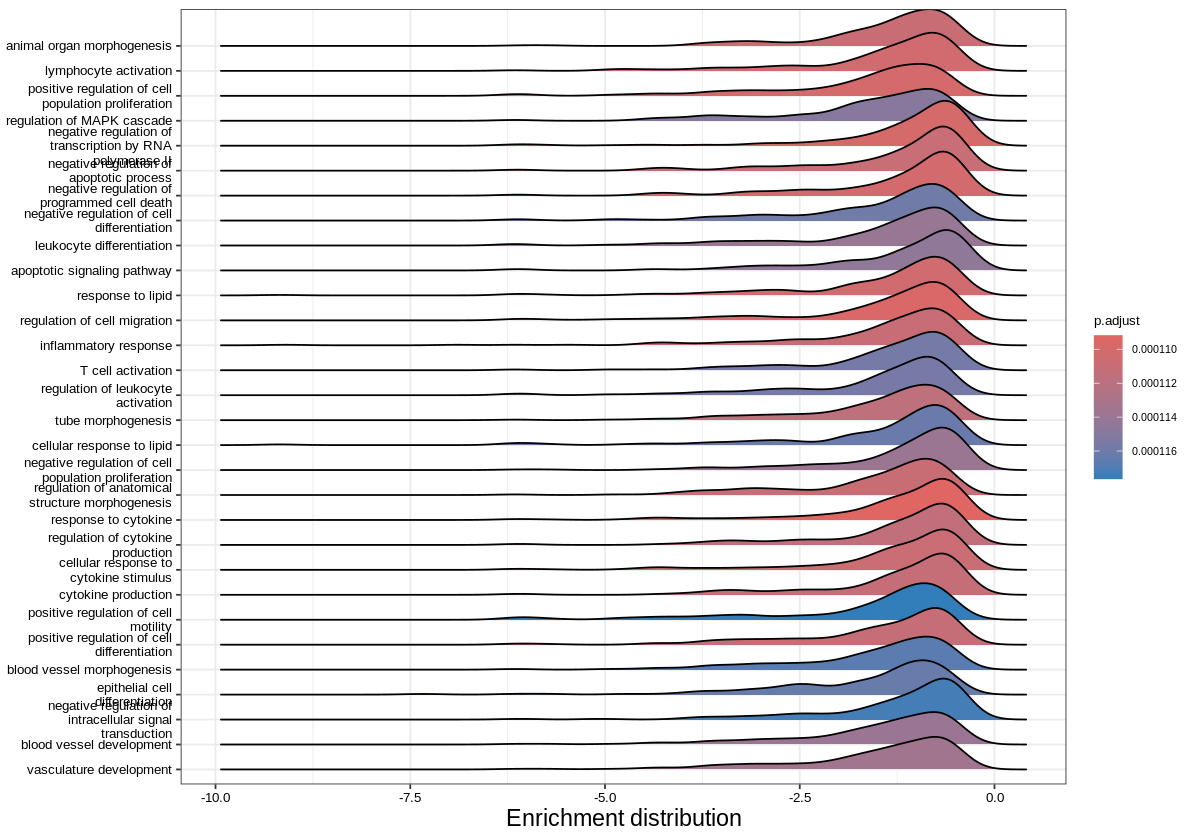

In [ ]:
ridgeplot(gse) + labs(x = "Enrichment distribution") +
  theme(text = element_text(size = 8),
        axis.text.x = element_text(size = 8),
        axis.text.y = element_text(size = 8))


ridgeplot(gse) creates a ridge plot using the gse data.

+ labs(x = "Enrichment distribution") adds a label to the x-axis of the plot. The label is "Enrichment distribution".

+ theme(text = element_text(size = 8), axis.text.x = element_text(size = 8), axis.text.y = element_text(size = 8)) customizes the theme of the plot. It sets the size of the text in the plot to 8 (using text = element_text(size = 8)), as well as the size of the text in the x-axis (axis.text.x = element_text(size = 8)) and the y-axis (axis.text.y = element_text(size = 8)).

Overall, the code creates a ridge plot of the gse data, with a label on the x-axis and customizes the size of the text in the plot and axes.

##Heat plot

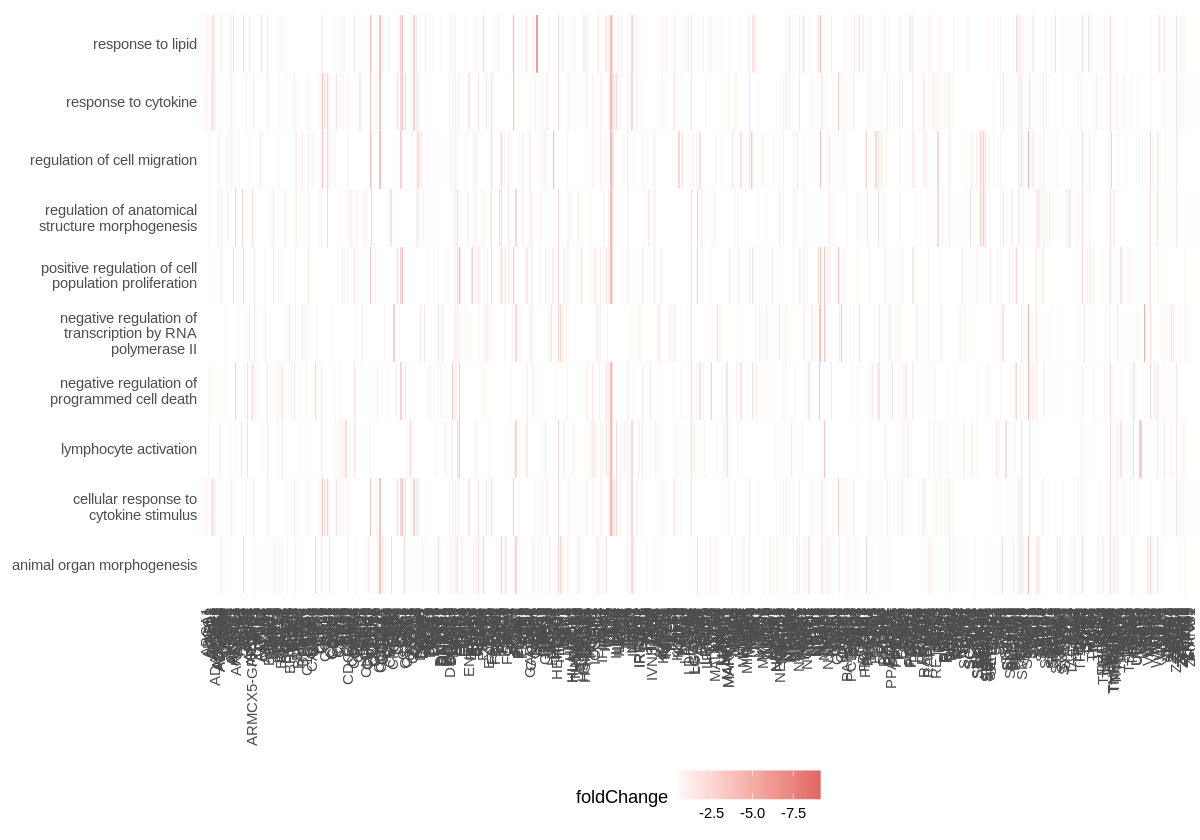

In [ ]:
heatplot(gse, showCategory = 10, foldChange=foldchanges) +
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=9)) +
        theme(legend.position="bottom")

heatplot(gse, showCategory = 10, foldChange=foldchanges) creates a heatmap plot of the gse data, using showCategory = 10 to only show the top 10 categories, and foldChange=foldchanges to use fold changes as the values.

+ theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=9)) customizes the appearance of the x-axis text, setting the angle to 90 degrees (angle = 90), setting the vertical justification to 0.5 (vjust = 0.5), setting the horizontal justification to 1 (hjust=1), and setting the text size to 9 (size=9).

+ theme(legend.position="bottom") sets the position of the legend to "bottom", so that it appears below the plot.

#Gene Set Enrichment Analysis for KEGG Pathways

In [ ]:
BiocManager::install("clusterProfiler")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.19 (BiocManager 1.30.23), R 4.4.1 (2024-06-14)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'clusterProfiler'”
Old packages: 'gert', 'Rcpp', 'tinytex', 'xfun'



R command that installs the clusterProfiler package from the Bioconductor repository. clusterProfiler is an R package that provides functions for gene set enrichment analysis and visualization. It allows you to perform over-representation analysis (ORA) and gene set enrichment analysis (GSEA) on gene sets or pathways, and provides various visualization functions to summarize and visualize the results.

In [ ]:
# SET THE DESIRED ORGANISM HERE
organism = "org.Hs.eg.db"
BiocManager::install(organism, character.only = TRUE)
library(organism, character.only = TRUE)
kegg_organism_code <- c("hsa")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.19 (BiocManager 1.30.23), R 4.4.1 (2024-06-14)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'org.Hs.eg.db'”
Old packages: 'gert', 'Rcpp', 'tinytex', 'xfun'



organism = "org.Hs.eg.db" sets the desired organism to "org.Hs.eg.db", which is the Bioconductor annotation package for the human genome.

BiocManager::install(organism, character.only = TRUE) installs the package corresponding to the organism variable using the BiocManager::install() function. The character.only = TRUE argument specifies that organism is a character string.

library(organism, character.only = TRUE) loads the org.Hs.eg.db package into the R session. The character.only = TRUE argument again specifies that organism is a character string.

kegg_organism_code <- c("hsa") sets the KEGG organism code for the organism to "hsa". The KEGG organism code is used in some functions in the clusterProfiler package to specify which organism's pathways to use. Here, we set it to "hsa" because we're working with the human genome (org.Hs.eg.db).

In [ ]:
library(clusterProfiler)

In [ ]:
#Load DESeq2 results file as input file
result <- read.table("/content/DESeq2_LC_R1.txt", sep="\t", header = TRUE, row.names=1)
#Check top 10 lines in results
head(result)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003,18.54618,-0.8541535,0.5297816,-1.612275,0.10690216,0.4156385
ENSG00000000419,380.70320,-0.7084002,0.3388836,-2.090394,0.03658242,0.2586112
ENSG00000000457,212.33184,0.2984078,0.1948226,1.531690,0.12559890,0.4471573
ENSG00000000460,83.97574,0.3497018,0.2837124,1.232593,0.21772781,0.5616664
ENSG00000000938,14342.17623,0.3673536,0.2431547,1.510782,0.13084409,0.4559165
ENSG00000000971,47.23397,0.5322437,0.3453163,1.541322,0.12323844,0.4434717


read.table("https://raw.githubusercontent.com/pine-bio-support/omicslogic/master/PDX_HTSeq_gene_expression_DESeq2_R.txt", sep="\t", header = TRUE, row.names=1) reads the DESeq2 results file from the given URL into an R data frame called result. The sep argument specifies that the file is tab-separated, header = TRUE indicates that the first row of the file contains column names, and row.names=1 specifies that the first column of the file contains row names.

head(result) displays the first 10 lines of the result data frame. The head() function is used to inspect the contents of the data frame and check that it has been loaded correctly.

In [ ]:
#list of KEGG pathways genes
data(kegg.sets.hs)

#Index of numbers of pathway
data(sigmet.idx.hs)

#Extract cleaner gene set of important pathways
kegg.sets.hs <- kegg.sets.hs[sigmet.idx.hs]

data(kegg.sets.hs) loads the KEGG pathway gene sets for the human genome into the R session. This data set is included in the clusterProfiler package.

data(sigmet.idx.hs) loads a vector of indices indicating which pathways are of interest. This vector is also included in the clusterProfiler package.

kegg.sets.hs <- kegg.sets.hs[sigmet.idx.hs] subsets the KEGG pathway gene sets to include only the pathways that are of interest, as indicated by the sigmet.idx.hs vector. The resulting kegg.sets.hs object is a named list of gene sets, where each gene set corresponds to a specific KEGG pathway. The names of the list correspond to the KEGG pathway IDs. By subsetting the list, we have extracted only the gene sets corresponding to the pathways of interest.

In [ ]:
# Convert gene IDs for gseKEGG function
# We will lose some genes here because not all IDs will be converted
ids<-bitr(rownames(result), fromType = "ENSEMBL", toType = "ENTREZID", OrgDb=organism)

# remove duplicate IDS (here I use "ENSEMBL", but it should be whatever was selected as keyType)
dedup_ids = ids[!duplicated(ids[c("ENSEMBL")]),]

# Create a new dataframe df2 which has only the genes which were successfully mapped using the bitr function above
res_dedup = result[dedup_ids$ENSEMBL,]

# Create a new column in df2 with the corresponding ENTREZ IDs
res_dedup$ENTREZID = dedup_ids$ENTREZID

#Extract the fold changes from the results
foldchanges <- res_dedup$log2FoldChange

# Name fold change vector with ENTREZ ids
names(foldchanges) <- res_dedup$ENTREZID

# omit any NA values
foldchanges<-na.omit(foldchanges)

# sort the list in decreasing order (required for clusterProfiler)
foldchanges = sort(foldchanges, decreasing = TRUE)

#check top 5 values
head(foldchanges)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(rownames(result), fromType = "ENSEMBL", toType = "ENTREZID", :
“22.86% of input gene IDs are fail to map...”


56163    727940     84528    219970 106478943    414060 
 5.542663  5.152095  4.982656  4.833886  4.827132  4.766486

ids<-bitr(rownames(result), fromType = "ENSEMBL", toType = "ENTREZID", OrgDb=organism) converts the gene IDs in result from Ensembl IDs to Entrez IDs using the bitr() function from the AnnotationDbi package. The OrgDb argument specifies the organism database to use for the conversion.

dedup_ids = ids[!duplicated(ids[c("ENSEMBL")]),] removes any duplicate gene IDs from the ids object, since some Ensembl IDs may map to the same Entrez ID.

res_dedup = result[dedup_ids$ENSEMBL,] subsets the result data frame to include only the genes that were successfully mapped to Entrez IDs.

res_dedup$ENTREZID = dedup_ids$ENTREZID creates a new column in res_dedup that contains the corresponding Entrez IDs.

foldchanges <- res_dedup$log2FoldChange extracts the log2 fold changes from the res_dedup data frame.

names(foldchanges) <- res_dedup$ENTREZID names the foldchanges vector with the corresponding Entrez IDs.

foldchanges<-na.omit(foldchanges) removes any NA values from the foldchanges vector.

foldchanges = sort(foldchanges, decreasing = TRUE) sorts the foldchanges vector in descending order, which is required for downstream analysis with clusterProfiler.

head(foldchanges) displays the first 5 values of the foldchanges vector. This is a way to check that the gene IDs were mapped correctly and the fold changes were extracted as expected.

In [ ]:
# #run GSEA for KEGG respository
gse2 <- gseKEGG(geneList=foldchanges,
               organism= kegg_organism_code,
               nPerm= 10000,
               minGSSize= 3,
               maxGSSize= 800,
               pvalueCutoff = 0.05,
               pAdjustMethod = "none",
               keyType= "ncbi-geneid",
               seed=T)

Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...

Reading KEGG annotation online: "https://rest.kegg.jp/conv/ncbi-geneid/hsa"...

using 'fgsea' for GSEA analysis, please cite Korotkevich et al (2019).


preparing geneSet collections...

GSEA analysis...

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
“We do not recommend using nPerm parameter incurrent and future releases”
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
“You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.13% of the list).
The order of those tied genes will be arbitrary, which 

In this code, the gseKEGG function from the clusterProfiler package is being used to run Gene Set Enrichment Analysis (GSEA) for the KEGG pathway database.

The input to the function is the foldchanges vector, which contains the log2 fold changes for each gene between two conditions. The organism argument specifies the KEGG organism code, which is "hsa" for human.

The nPerm argument specifies the number of permutations used to calculate the significance of the enrichment score. The minGSSize and maxGSSize arguments specify the minimum and maximum number of genes in a gene set, respectively.

The pvalueCutoff argument specifies the p-value cutoff used to select significant pathways. The pAdjustMethod argument specifies the method used for multiple testing correction, which is set to "none" in this case.

The keyType argument specifies the type of gene ID used for the analysis, which is "ncbi-geneid" in this case. Finally, the seed argument is used to set the random seed for reproducibility.






In [ ]:
write.csv(gse2,"LC_KEGG_GSEA.csv")

The command "write.csv(gse2,"PDX_KEGG_GSEA.csv")" is likely a line of code written in the R programming language.

This command is used to export the contents of an R data frame called "gse2" into a CSV file called "PDX_KEGG_GSEA.csv".

The "write.csv()" function is used to write a data frame to a file in comma-separated value (CSV) format. The first argument to the function is the data frame to be written to the file, and the second argument is the file name and path where the data frame should be saved.

Assuming that the R script containing this line of code is run, the resulting CSV file will be saved in the working directory of the R session, with the file name "PDX_KEGG_GSEA.csv".

In [ ]:
library(repr)

# Change plot size to 8 inches wide
options(repr.plot.width=10)

library(repr) loads the repr package, which provides the ability to modify plot size and other graphical parameters.
options(repr.plot.width=10) sets the plot width to 10 inches using the options() function.
Note that the repr.plot.width option only affects the width of future plots that are created after this option is set. If you want to change the size of an existing plot, you can use other functions like png() or pdf() to create a new file with the desired size.

##Dotplot

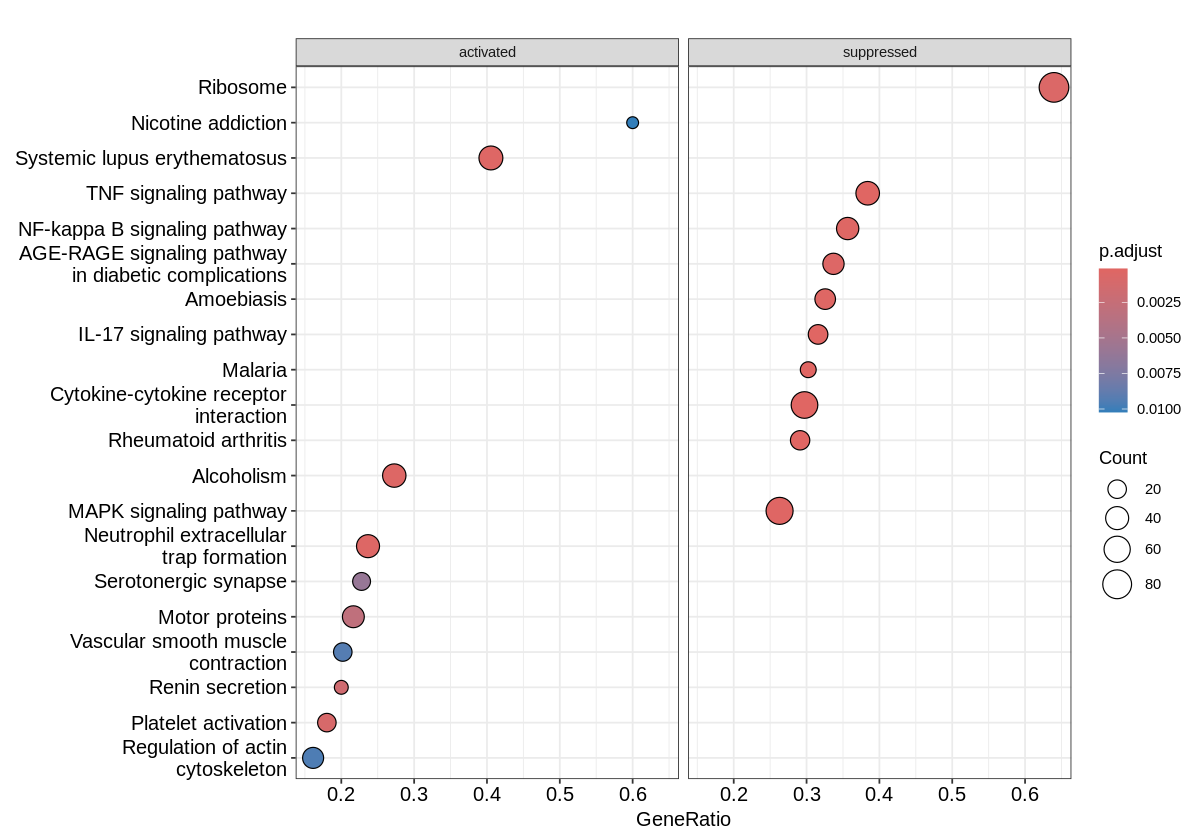

In [ ]:
require(DOSE)
dotplot(gse2, showCategory=10, split=".sign") + facet_grid(.~.sign)

require(DOSE) loads the DOSE package into R, if it is not already loaded.
dotplot(gse2, showCategory=10, split=".sign") creates the dotplot with the following arguments:
gse2 is the data frame or matrix containing the input data.
showCategory=10 specifies the maximum number of significant categories to show.
split=".sign" splits the plot into two facets based on the .sign column of the input data.
+ facet_grid(.~.sign) adds the facet_grid() function to the plot to facet it by the .sign column. The dot (.) on the left side of the tilde (~) means to facet by rows, while the .sign on the right side means to facet by the .sign column.

##Category Network Plot

Warning message in cnetplot.enrichResult(x, ...):
“Use 'color.params = list(foldChange = your_value)' instead of 'foldChange'.
 The foldChange parameter will be removed in the next version.”
Warning message:
“Removed 110 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”


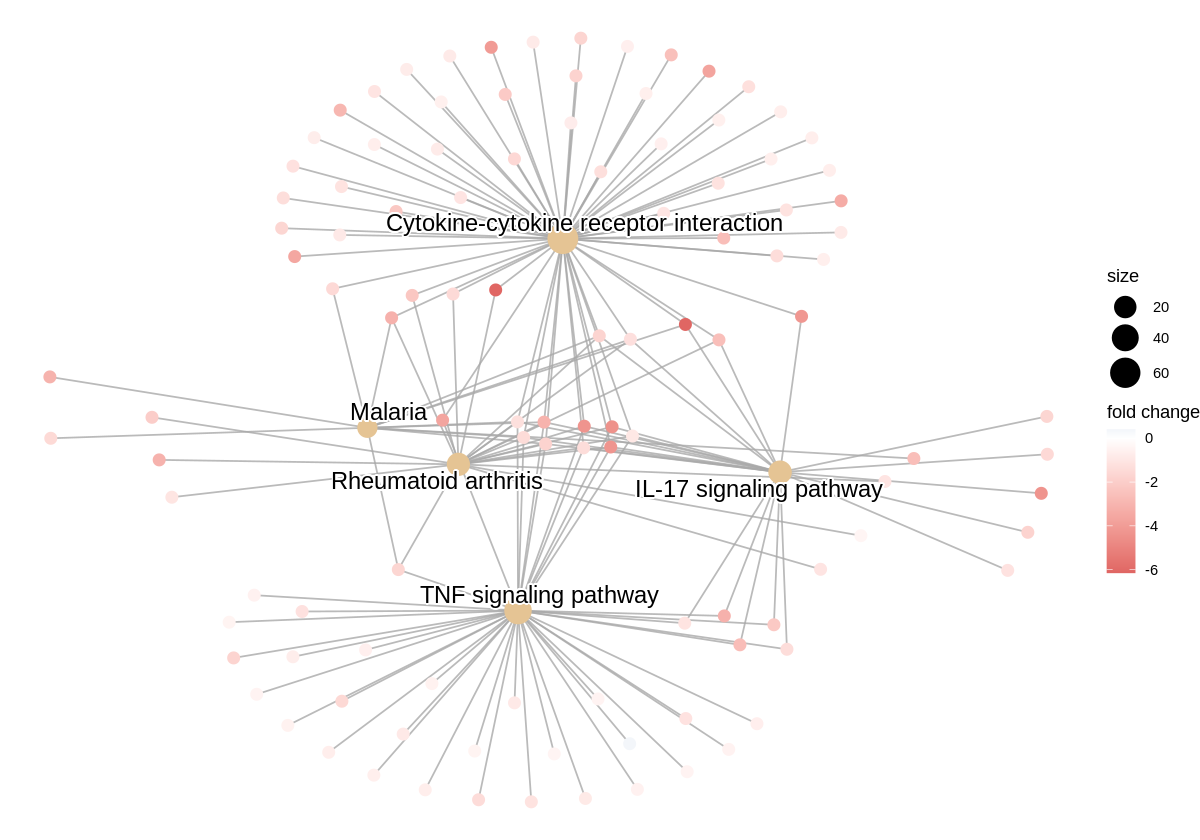

In [ ]:
# categorySize can be either 'pvalue' or 'geneNum'
cnetplot(gse2,font.size=4, categorySize="geneNum", foldChange=foldchanges,max.overlaps=50,node_label="category")

cnetplot(gse2, font.size=4, categorySize="geneNum", foldChange=foldchanges, max.overlaps=50, node_label="category"): This function takes in several arguments to create the plot:

gse2: This is the input data frame that contains the gene expression data.
font.size=4: This sets the font size of the text in the plot to 4.
categorySize="geneNum": This argument specifies the size of the nodes in the plot based on the number of genes in each category.
foldChange=foldchanges: This argument specifies the fold changes for the input data, which will be used to color-code the nodes.
max.overlaps=50: This sets the maximum number of overlapping nodes that can be displayed in the plot.
node_label="category": This sets the labels of the nodes to the name of the category they belong to.

Warning message in cnetplot.enrichResult(x, ...):
“Use 'color.params = list(foldChange = your_value)' instead of 'foldChange'.
 The foldChange parameter will be removed in the next version.”
Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”
Warning message:
“ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


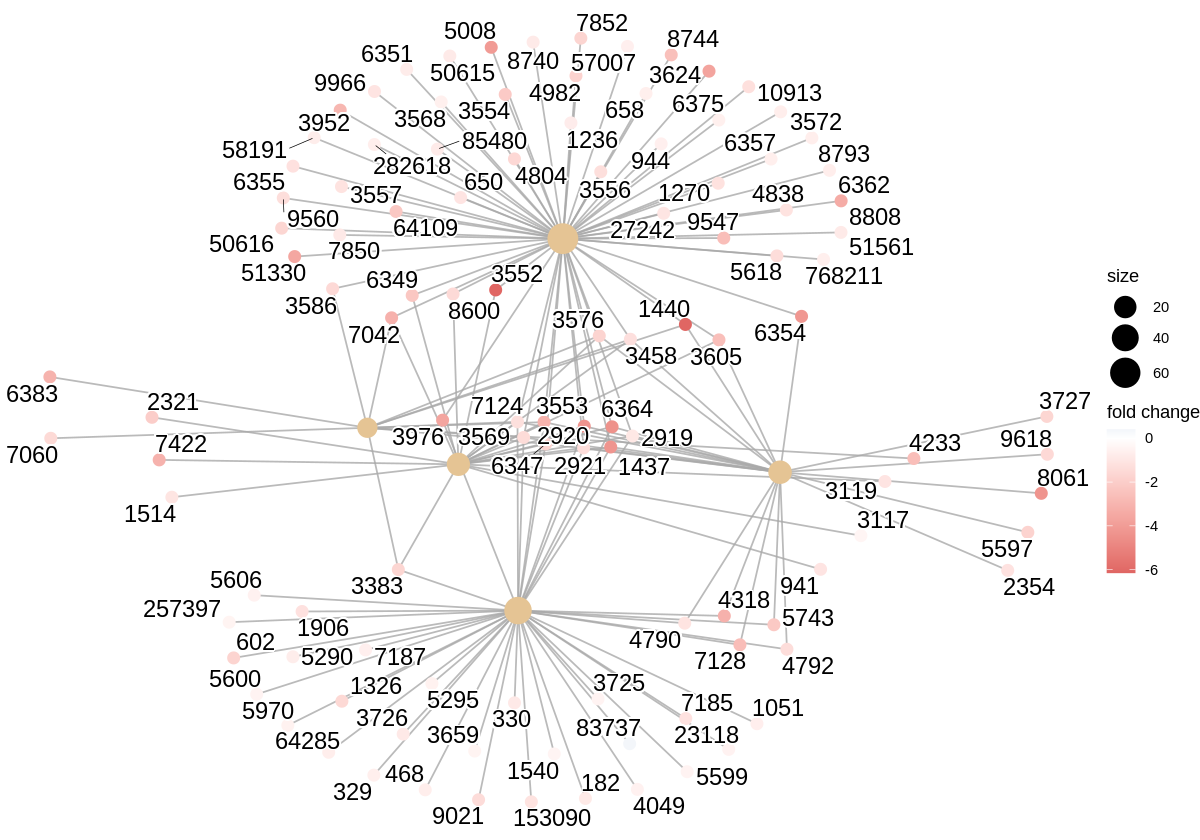

In [ ]:
# categorySize can be either 'pvalue' or 'geneNum'
cnetplot(gse2,font.size=4, categorySize="geneNum", foldChange=foldchanges,max.overlaps=50,node_label="gene")

cnetplot(gse2, font.size=4, categorySize="geneNum", foldChange=foldchanges, max.overlaps=50, node_label="category"): This function takes in several arguments to create the plot:

gse2: This is the input data frame that contains the gene expression data.
font.size=4: This sets the font size of the text in the plot to 4.
categorySize="geneNum": This argument specifies the size of the nodes in the plot based on the number of genes in each category.
foldChange=foldchanges: This argument specifies the fold changes for the input data, which will be used to color-code the nodes.
max.overlaps=50: This sets the maximum number of overlapping nodes that can be displayed in the plot.
node_label="category": This sets the labels of the nodes to the name of the category they belong to.

##Upset plot

In [ ]:
install.packages("ggupset")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



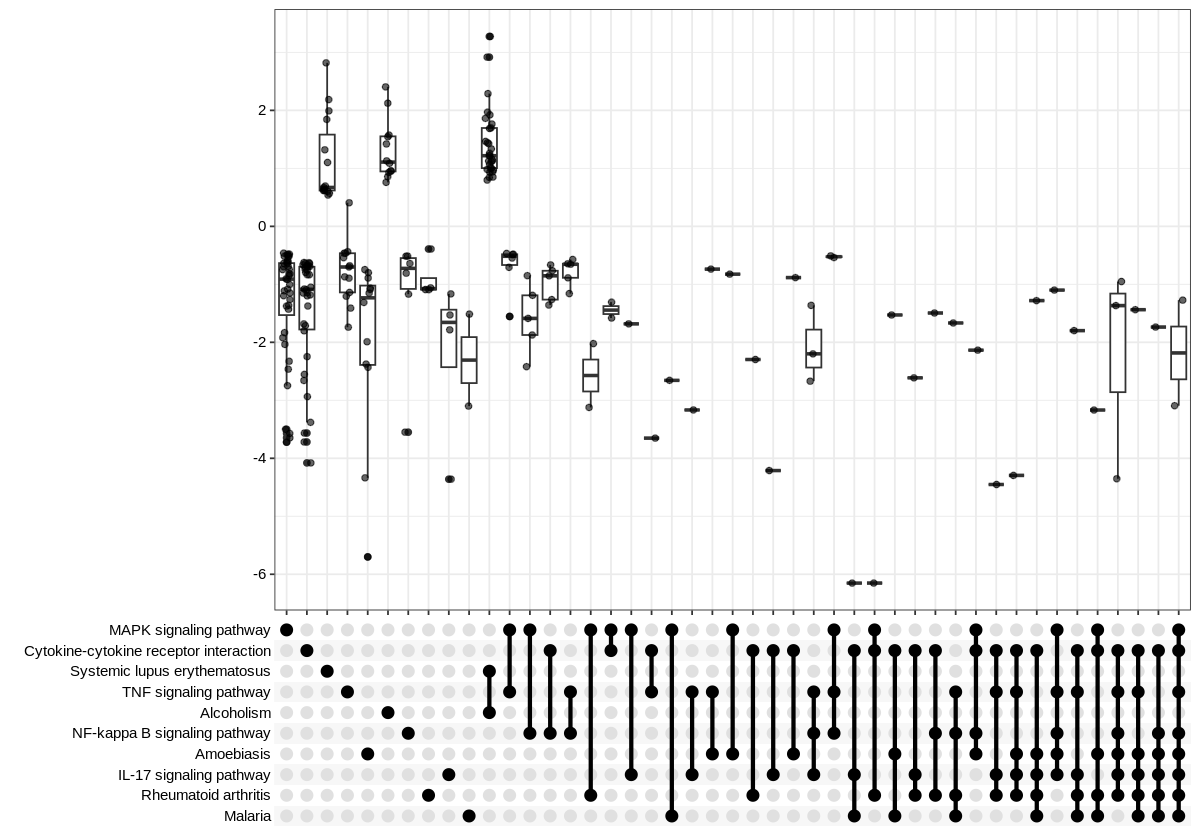

In [ ]:
library(ggupset)
enrichplot::upsetplot(gse2, n = 10) + theme(axis.text.y = element_text(size = 9))

The ggupset package provides a set of functions that allow users to create UpSet plots that are based on the ggplot2 package, which provides an easy and flexible way to customize the plot aesthetics. The ggupset package can be used to visualize data from a wide range of applications, including genomics, proteomics, and social network analysis.

##Ridgeplot

In [ ]:
install.packages("ggridges")
library(ggridges)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Picking joint bandwidth of 0.338



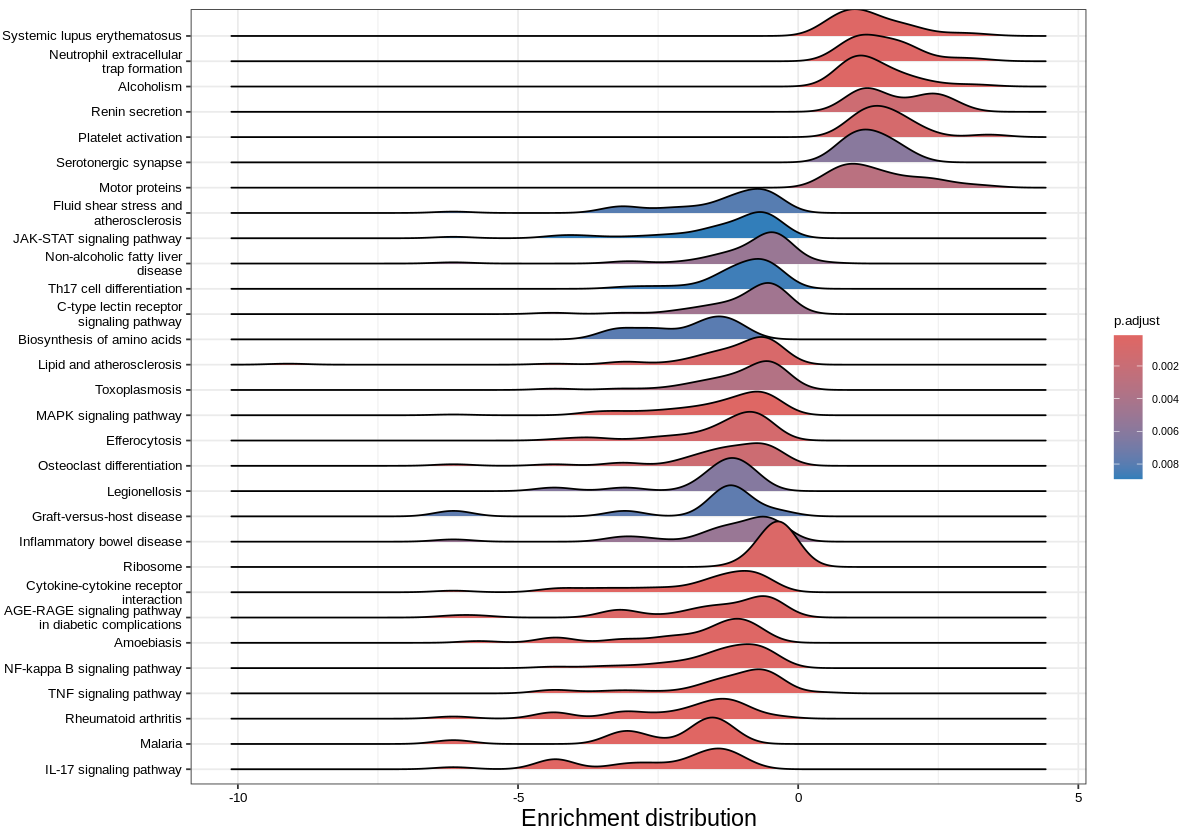

In [ ]:
ridgeplot(gse2) + labs(x = "Enrichment distribution") +
  theme(text = element_text(size = 8),
        axis.text.x = element_text(size = 8),
        axis.text.y = element_text(size = 8))

ridgeplot(gse2) - This creates a ridge plot of the data represented by gse2. A ridge plot is a type of density plot that shows the distribution of a continuous variable across different groups.

labs(x = "Enrichment distribution") - This adds a label to the x-axis of the plot, indicating that it represents the "Enrichment distribution".

theme(text = element_text(size = 8), axis.text.x = element_text(size = 8), axis.text.y = element_text(size = 8)) - This sets the theme of the plot, which affects the appearance of various elements such as text, axis labels, and tick marks. In this case, the code sets the size of the text to 8 points for the overall plot (text argument), as well as for the x-axis and y-axis labels (axis.text.x and axis.text.y arguments, respectively).

##Heat plot

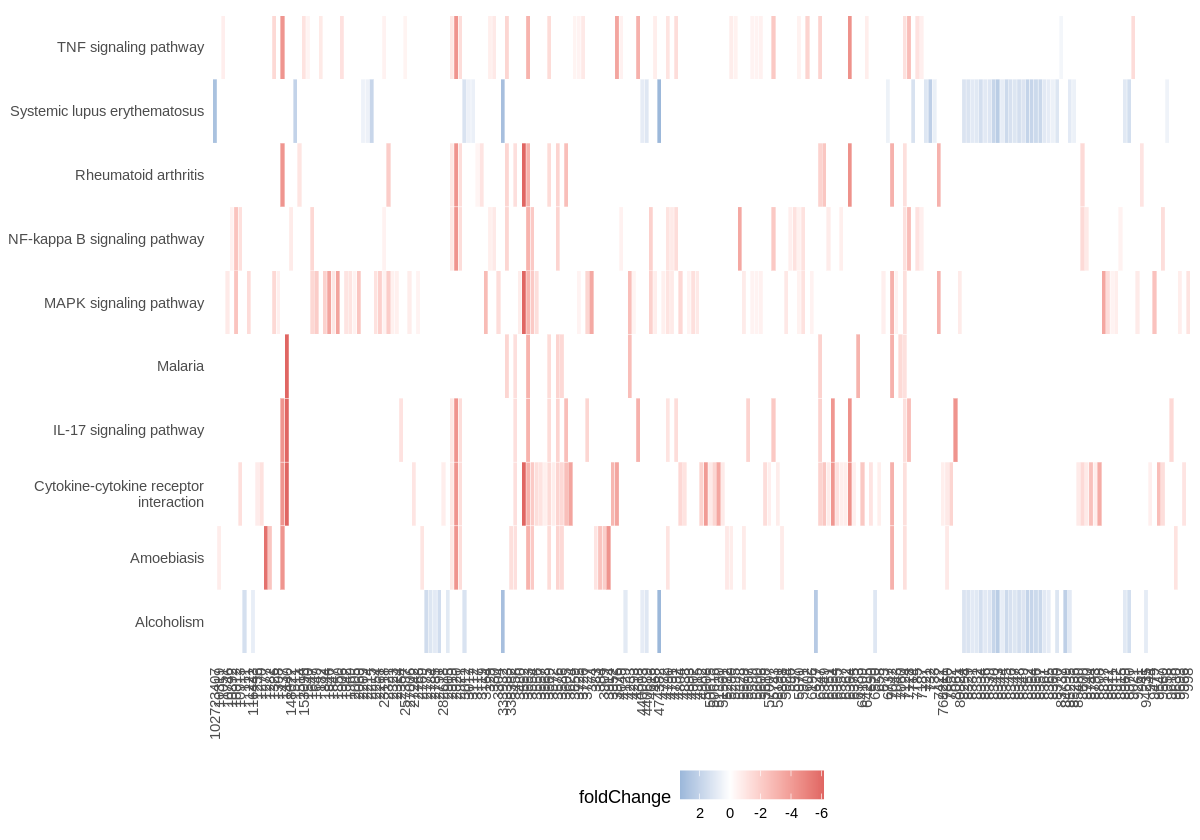

In [ ]:
heatplot(gse2, showCategory = 10, foldChange=foldchanges) +
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=9)) +
        theme(legend.position="bottom")

heatplot(gse2, showCategory = 10, foldChange=foldchanges) - This creates a heat map of the data represented by gse2. The showCategory argument specifies the number of categories to display, and the foldChange argument specifies the fold change values to use for the plot.

theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=9)) - This sets the theme of the plot, specifically for the x-axis labels. The axis.text.x argument specifies that the settings apply to the x-axis labels. The angle argument rotates the x-axis labels by 90 degrees, vjust specifies the vertical justification of the labels, hjust specifies the horizontal justification of the labels, and size sets the font size of the labels.

theme(legend.position="bottom") - This sets the position of the legend to "bottom", indicating that the legend will be displayed at the bottom of the plot.